In [8]:
from riffusion.streamlit.tasks import interpolation
from riffusion.datatypes import InferenceInput, PromptInput
import riffusion.streamlit.util as streamlit_util
from riffusion.spectrogram_params import SpectrogramParams


In [9]:
use_20k = True

if use_20k:
        params = SpectrogramParams(
            min_frequency=10,
            max_frequency=20000,
            sample_rate=44100,
            stereo=True,
        )
else:
        params = SpectrogramParams(
            min_frequency=0,
            max_frequency=10000,
            stereo=False,
        )
f1_wav = "test/test_data/mix1.wav"
f2_wav = "test/test_data/mix2.wav"

mix1_segment = streamlit_util.load_audio_file(f1_wav)
mix2_segment = streamlit_util.load_audio_file(f1_wav)

mixout_image = streamlit_util.spectrogram_image_from_audio(mix1_segment,params=params, device="cpu")

mixin_image = streamlit_util.spectrogram_image_from_audio(mix1_segment,params=params, device="cpu")

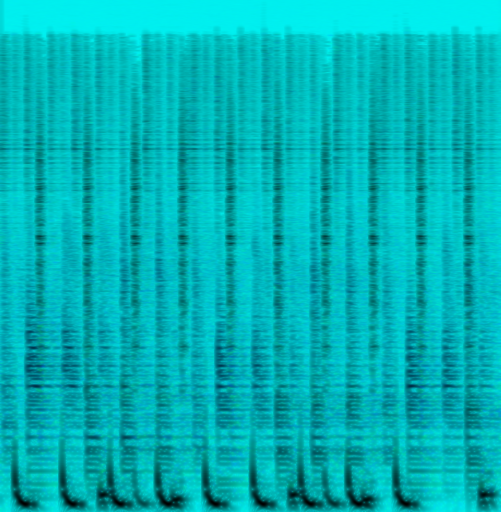

In [10]:
mixout_image

In [11]:
prompt_a = interpolation.create_prompt_input("Berlin Techno", 42)
prompt_b = interpolation.create_prompt_input("Deep House with funky Bassline", 42)

prompt_a

PromptInput(prompt='Berlin Techno', seed=42, negative_prompt='', denoising=0.5, guidance=7.0)

In [ ]:


output_interpolation = interpolation.prepare_interpolation(
    extension='wav',
    num_interpolation_steps=5,
    num_inference_steps=50,
    guidance=0.5,
    init_image_name='custom',
    init_image_file=mixout_image,
    alpha_power=1.0,
    show_individual_outputs=False,
    show_images=False,
    prompt_a=prompt_a,
    prompt_b=prompt_b)

2025-01-10 16:10:02.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 16:10:02.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 16:10:02.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


<PIL.Image.Image image mode=RGB size=501x512 at 0x1C9B9BFDC40>
Using device: cpu
<PIL.Image.Image image mode=RGB size=501x512 at 0x1CE6339FC10>


Fetching 15 files: 100%|██████████| 15/15 [00:00<?, ?it/s]
2025-01-10 16:10:02.750 Thread 'Thread-35': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 16:10:02.754 Thread 'Thread-35': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
output_interpolation

In [ ]:
import pydub 
# Load the audio from the io.BytesIO object using pydub
audio = pydub.AudioSegment.from_file(output_interpolation)

# Convert the audio to a format that IPython can play (e.g., wav or mp3)
# You can export to another format if necessary
audio.export("temp_audio.wav", format="wav")

<_io.BufferedRandom name='temp_audio.wav'>